# Desafio AAWZ

## Título
Desenvolver uma análise quantitativa e gráfica relacionando o aumento das ações da
Petrobrás (PETR4) com as variações da taxa SELIC para os últimos 10 anos.

## Objetivo
Fazer um programa em python para:
- Extrair as informações dos sites: https://www.infomoney.com.br/petrobras-petr4/cotacoes e 
https://www.bcb.gov.br/pec/copom/port/taxaselic.asp e tratá-las;
- Armazenar as informações tratadas no SQLite;
  - Utilizar, de preferência, ORM (object relational mapping)
- Ler as informações do banco e apresentar em formato gráfico.

## Restrições
- Utilizar a biblioteca pandas do Python

---

## ETL
- Vou utilizar a granularidade mensal para a análise.
- Será feito 2 scrapping. Para garantir um serviço menos monolítico farei cada scrapping separado. Desta forma é possível garantir uma melhor manutenção de código.

In [126]:
! python3 etl_PETR4.py

get page:  <Response [200]>
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4965 entries, 0 to 0
Data columns (total 2 columns):
Ano           4965 non-null int16
Fechamento    4965 non-null float16
dtypes: float16(1), int16(1)
memory usage: 58.2 KB
None

(petr4.db) salvo!


In [127]:
! python3 etl_SELIC.py

get page:  <Response [200]>
<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 0 to 0
Data columns (total 2 columns):
Ano           81 non-null int16
Taxa SELIC    81 non-null float16
dtypes: float16(1), int16(1)
memory usage: 972.0 bytes
None

(selic.db) salvo!


#### Granularidade anual: 
- Tanto a taxa selic quanto a PETR4 devem ser de mesma granularidade
- Nível do grão = ano
- Isso garante insights mais fáceis entre os dados

#### Banco de dados
- Os 2 banco de dados armazenam somente os dados de fechamento.
- Acredito que assim trás uma análise mais fundamentalista sobre índices e ativos financeiros.
- Fiz algumas conversões de tipo para armazenar a menor quantidade possível de dados. 

### Load

In [128]:
import numpy as np
import pandas as pd
import sqlite3

In [129]:
# Create connection
conn = sqlite3.connect('desafio_AAWZ.db')

#load data
df_selic = pd.read_sql_query("SELECT * FROM selic", conn)
df_petr4 = pd.read_sql_query("SELECT * FROM petr4", conn)

In [130]:
df_selic

,Ano,Taxa SELIC
0,2008,13.656250
1,2009,8.648438
2,2010,10.656250
3,2011,10.898438
4,2012,7.140625
5,2013,9.898438
6,2014,11.648438
7,2015,14.148438
8,2016,13.648438
9,2017,6.898438


In [131]:
df_petr4

,Ano,Fechamento
0,2008,22.843750
1,2009,36.687500
2,2010,27.296875
3,2011,21.484375
4,2012,19.515625
5,2013,17.078125
6,2014,10.023438
7,2015,6.699219
8,2016,14.867188
9,2017,16.093750


### Gráficos

In [132]:
import matplotlib.pyplot as plt
%matplotlib inline

# para visualizar de forma ampla dentro do notebook
plt.rcParams['figure.figsize'] = (15, 8)

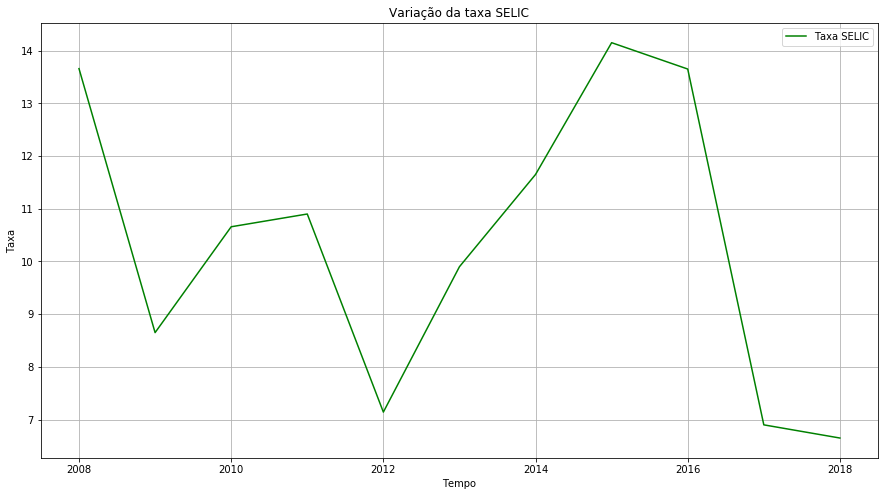

In [133]:
# visualização do gráfico SELIC
x_selic = df_selic['Ano']
y_selic = df_selic['Taxa SELIC']

fig, selic_grafico = plt.subplots()
plt.plot(x_selic, y_selic, color='green', label='Taxa SELIC')
plt.grid()
plt.xlabel('Tempo')
plt.ylabel('Taxa')
plt.title("Variação da taxa SELIC")
plt.legend(loc="upper right")
plt.legend()
plt.show()

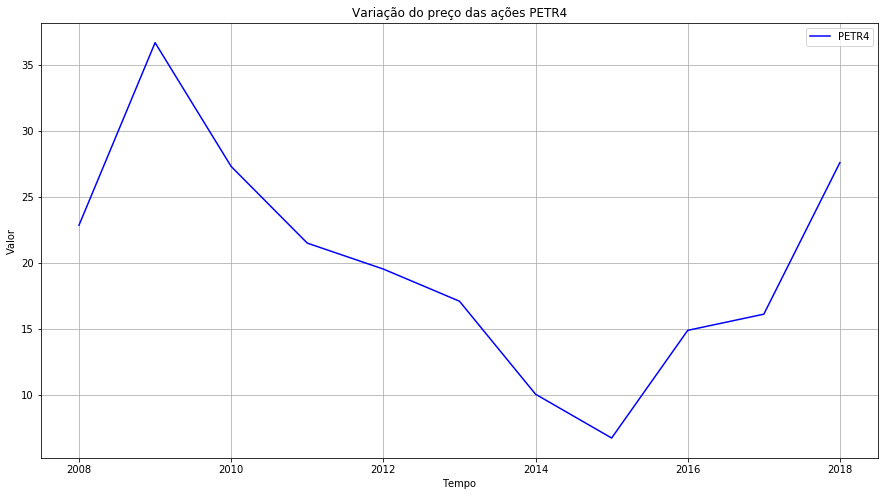

In [134]:
# visualização do gráfico PETR4
x_petr4 = df_petr4['Ano']
y_petr4 = df_petr4['Fechamento']

fig, petr4_grafico = plt.subplots()
plt.plot(x_petr4, y_petr4, color='blue', label='PETR4')
plt.grid()
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.title("Variação do preço das ações PETR4")
plt.legend(loc="upper right")
plt.legend()
plt.show()

### Plotagem no mesmo gráfico

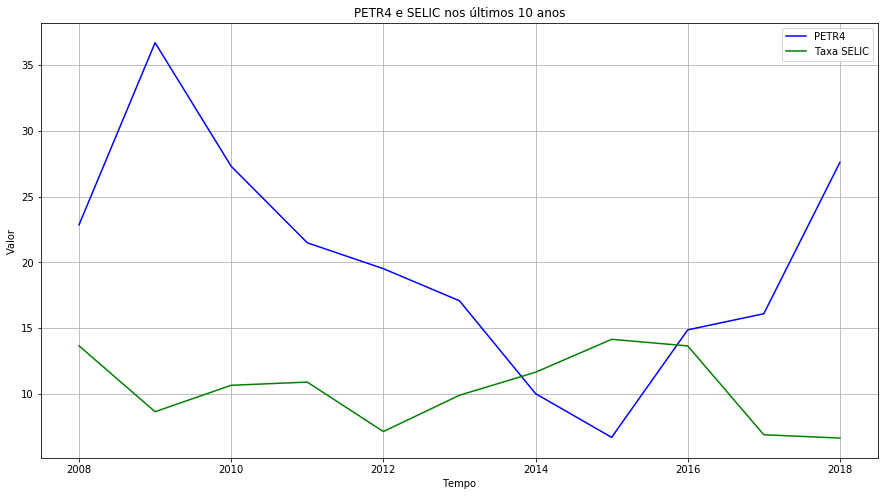

In [135]:
plt.plot(x_petr4, y_petr4, color='blue', label='PETR4')
plt.plot(x_selic, y_selic, color='green', label='Taxa SELIC')

plt.grid()
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.title("PETR4 e SELIC nos últimos 10 anos")
plt.legend(loc="upper right")
plt.legend()
plt.show()

---

## Predição do fechamento do preço PETR4 a partir da taxa SELIC

In [136]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df_selic[['Taxa SELIC']]

# escolhendo a variável dependente
y = df_petr4[['Fechamento']]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
                                    X, 
                                    y, 
                                    test_size=0.25)

In [137]:
model = LinearRegression()
model = model.fit(X_train, y_train)
y_pred_model = model.predict(X_test)

# prediction valor aleatório
meta_selic = 10
predicao_petr4 = model.predict(meta_selic)
print(f'A predição do fechamento anual para PETR4, (se meta SELIC = {meta_selic}) se baseando numa regressão linear é: R${predicao_petr4} reais.')

A predição do fechamento anual para PETR4, (se meta SELIC = 10) se baseando numa regressão linear é: R$[[22.36657564]] reais.


---

## Fontes:


#### SQLITE:
- https://www.fullstackpython.com/object-relational-mappers-orms.html (ORM)
- http://pythonclub.com.br/gerenciando-banco-dados-sqlite3-python-parte1.html
- http://www.devfuria.com.br/linux/instalando-sqlite/